Descartes doesn't have Landsat Surface Reflectance in Collection form, so we are using LSRU: https://github.com/ecohydro/lsru

In [9]:
import shapely as shp
import geojson
import geopandas as gpd
import os
from lsru import Usgs
from lsru import Espa
from pprint import pprint
import datetime
import time
DATA_DIR = "/home/rave/tana-crunch/waves/Mask_RCNN/data/"
GEOJSON_DIR = os.path.join(DATA_DIR,"geojson-aois/")
LANDSAT_DIR = os.path.join(DATA_DIR, "landsat-8-sr")
waves_LANDSAT_DIR = "/home/caylor-lab/data/"

Download NHD water boundary from https://viewer.nationalmap.gov/basic/#productSearch

and convert shapefiles to geojson with ogr2ogr (see bash-scripts folder). Then we can get the bounding box and possibly use the geojson later for other programmatic tools.

In [265]:
os.listdir(GEOJSON_DIR)

['santa_margarita_river_surr_d2_wbdhu2.shp-converted.geojson',
 'santa_clara_v1.shp-converted.geojson',
 'santacruz_sanpedro_wbdhu6_d.shp-converted.geojson',
 'lowercolorado_wbdhu2.shp-converted.geojson',
 'north_platte_river_western_nb.shp-converted.geojson',
 'santa_ynez_river_d_wbdhu10.shp-converted.geojson']

In [ ]:
watershed_path = os.path.join(GEOJSON_DIR,"north_platte_river_western_nb.geojson")
watershed = gpd.io.file.read_file(watershed_path)
ax = watershed.plot()
watershed.envelope.boundary.plot(ax=ax)

In [45]:
bbox = list(watershed.envelope.boundary.bounds.iloc[0])

# Instantiate Usgs class and login. requires setting config with credentials
usgs = Usgs()
usgs.login()

# Query the Usgs api to find scene intersecting with the spatio-temporal window
# help(usgs.search)
scene_list = usgs.search(collection='LANDSAT_8_C1',
                         bbox=bbox,
                         begin=datetime.datetime(2014,1,1),
                         end=datetime.datetime(2017,1,1),
                         max_results=300,
                         max_cloud_cover=10)
# Extract Landsat scene ids for each hit from the metadata
scene_list = [x['displayId'] for x in scene_list]


In [30]:
help(usgs.search)

Help on method search in module lsru:

search(collection, bbox, begin=None, end=None, max_cloud_cover=100, months=None, starting_number=1, max_results=50000) method of lsru.Usgs instance
    Perform a spatio temporal query on Landsat catalog
    
    Args:
        collection (str): Landsat collection to query.
            Use LANDSAT_8_C1, LANDSAT_ETM_C1 and LANDSAT_TM_C1 for OLI, ETM+,
            and TM respectively
        bbox (tuple): A bounding box in the form of a tuple (left, bottom,
            right, top)
        begin (datetime.datetime): Optional begin date
        end (datetime.datetime): Optional end date
        max_cloud_cover (int): Cloud cover threshold to use for the query
        months (list): List of month indices (1,12) for only limiting the query
            to these months
        max_results (int): Maximum number of scenes to return
        starting_number (int): Used to determine the result number to start
            returning from. Is meant to be used when 

Currently, best workflow is to check which path/rows intersect your boundary manually with https://landsat.usgs.gov/pathrow-shapefiles

In [46]:
## pathrow_list_scsp = ['037037','036037','035037', '035038', '036038'] #path rows for santa clara-sanpedro HUC-6 NHD WBD
pathrow_list_western_nb = ['032031','033031']
kept_scenes = []
filtered = [scene for scene in scene_list if any(good_pathrow in scene for good_pathrow in pathrow_list_western_nb)]
print(len(filtered))
print(len(scene_list))

51
180


In [49]:
bad_dates = ['20160223']
kept_scenes = []
filtered = [scene for scene in filtered if not any(bad_date in scene for bad_date in bad_dates)]

In [50]:
filtered

['LC08_L1TP_032031_20140109_20170307_01_T1',
 'LC08_L1TP_032031_20140226_20170307_01_T1',
 'LC08_L1TP_033031_20140305_20170307_01_T1',
 'LC08_L1TP_032031_20140314_20170306_01_T1',
 'LC08_L1TP_032031_20140602_20170305_01_T1',
 'LC08_L1TP_033031_20140625_20170304_01_T1',
 'LC08_L1TP_032031_20140720_20170304_01_T1',
 'LC08_L1TP_033031_20140812_20170304_01_T1',
 'LC08_L1TP_032031_20140821_20170303_01_T1',
 'LC08_L1TP_033031_20140913_20170303_01_T1',
 'LC08_L1TP_033031_20141031_20170303_01_T1',
 'LC08_L1TP_033031_20141202_20170302_01_T1',
 'LC08_L1TP_032031_20141211_20170302_01_T1',
 'LC08_L1TP_033031_20141218_20170302_01_T1',
 'LC08_L1TP_032031_20141227_20170302_01_T1',
 'LC08_L1TP_032031_20150128_20180131_01_T1',
 'LC08_L1TP_033031_20150308_20170301_01_T1',
 'LC08_L1TP_033031_20150324_20170301_01_T1',
 'LC08_L1TP_033031_20150511_20170301_01_T1',
 'LC08_L1TP_033031_20150628_20170301_01_T1',
 'LC08_L1TP_033031_20150714_20170226_01_T1',
 'LC08_L1TP_032031_20150723_20170226_01_T1',
 'LC08_L1T

In [51]:
espa.get_available_products(filtered)

{'olitirs8_collection': {'inputs': ['LC08_L1TP_032031_20140109_20170307_01_T1',
   'LC08_L1TP_032031_20140226_20170307_01_T1',
   'LC08_L1TP_033031_20140305_20170307_01_T1',
   'LC08_L1TP_032031_20140314_20170306_01_T1',
   'LC08_L1TP_032031_20140602_20170305_01_T1',
   'LC08_L1TP_033031_20140625_20170304_01_T1',
   'LC08_L1TP_032031_20140720_20170304_01_T1',
   'LC08_L1TP_033031_20140812_20170304_01_T1',
   'LC08_L1TP_032031_20140821_20170303_01_T1',
   'LC08_L1TP_033031_20140913_20170303_01_T1',
   'LC08_L1TP_033031_20141031_20170303_01_T1',
   'LC08_L1TP_033031_20141202_20170302_01_T1',
   'LC08_L1TP_032031_20141211_20170302_01_T1',
   'LC08_L1TP_033031_20141218_20170302_01_T1',
   'LC08_L1TP_032031_20141227_20170302_01_T1',
   'LC08_L1TP_032031_20150128_20180131_01_T1',
   'LC08_L1TP_033031_20150308_20170301_01_T1',
   'LC08_L1TP_033031_20150324_20170301_01_T1',
   'LC08_L1TP_033031_20150511_20170301_01_T1',
   'LC08_L1TP_033031_20150628_20170301_01_T1',
   'LC08_L1TP_033031_201507

In [52]:
# Instantiate Espa class
espa = Espa()
espa.get_available_products(filtered)
# Place order (full scenes, no reprojection, sr and pixel_qa)
order = espa.order(scene_list=filtered, products=['sr', 'pixel_qa', 'bt', 'sr_ndvi', 'sr_ndmi'])
print(order.orderid)

espa-ravery@ucsb.edu-11082018-140616-544


In [11]:
help(espa)

Help on Espa in module lsru object:

class Espa(_EspaBase)
 |  Interface to the Espa API
 |  
 |  Espa is a platform providing on demand pre-processing of Landsat surface
 |  data. This class uses the API of the espa platform to query and place orders
 |  programatically
 |  
 |  Attributes:
 |      USER (str): Usgs username
 |      PASSWORD (str): Usgs password
 |      host (str): API host url
 |  
 |  Args:
 |      conf (str): Path of the config file containing usgs credentials
 |  
 |  Method resolution order:
 |      Espa
 |      _EspaBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, conf='/home/rave/.lsru')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_available_products(self, scene_list)
 |      Get the list of available products for each elements of a list of scene ids
 |      
 |      Args:
 |          scene_list (list): List of scene ids
 |      
 |      Example:
 |          >>> from lsru import Espa
 |   

In [27]:
espa = Espa()
help(espa.orders[0])

Help on Order in module lsru object:

class Order(_EspaBase)
 |  Class to deal with espa orders
 |  
 |  Attributes:
 |      orderir (str): Espa order ID
 |  
 |  Args:
 |      orderid (str): Espa order ID
 |      conf (str): Path to file containing usgs credentials
 |  
 |  Method resolution order:
 |      Order
 |      _EspaBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, orderid, conf='/home/rave/.lsru')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  cancel(self)
 |      Cancel the order
 |      
 |      Orders are processed in the order they were placed. Cancelling an order
 |      may be useful when the order is blocking other orders
 |      
 |      Return:
 |          dict: The response of the API to the cancellation order
 |  
 |  download_all_complete(self, path, unpack=False, overwrite=False, check_complete=True)
 |      Download all completed scenes of the order to a folder
 |      
 |      Args:
 |         

Only use this to check relatively small orders that are in the 10s of scenes. Orders in the 100s of scenes will take longer, particularly for Landsat 8 surface reflectance.

In [5]:
for order in espa.orders:
    while order.is_complete==False:
    # Orders have their own class with attributes and methods
        print('%s: %s' % (order.orderid, order.status))
        time.sleep(120)

espa-ravery@ucsb.edu-11072018-191858-760: ordered


KeyboardInterrupt: 

In [54]:
for order in espa.orders:
    if order.is_complete:
        order.download_all_complete(waves_LANDSAT_DIR)

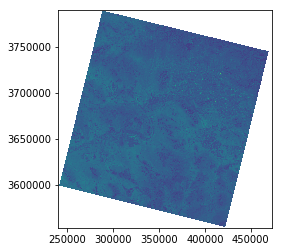

In [244]:
import rasterio as rast
import rasterio.plot as rsplot
import geopandas as gpd
src=rast.open(os.path.join(LANDSAT_DIR,"LC08_L1TP_037037_20140112_20170307_01_T1_sr_band3.tif"))
fig,ax=plt.subplots()
rsplot.show(src,ax=ax)

plt.show()

Below are some descartes labs methods for querying info and scenes, but Descartes doesn't have collection level 2 surface reflectance (only precollection, before April 2017)

Use Descartes to view Landsat Scenes that intersect with the bbox.

In [22]:
from descarteslabs.client.services import Metadata
products = Metadata().available_products()
products

[
  '251a7d278093949f950c5076c50130f77042b955:research_test',
  'landsat:LC08:01:RT:TOAR',
  'landsat:LC08:01:T1:TOAR',
  'landsat:LC08:01:T2:TOAR',
  'landsat:LC08:PRE:LaSRC',
  'landsat:LC08:PRE:TOAR',
  'landsat:LE07:01:RT:TOAR',
  'landsat:LE07:01:T1:TOAR',
  'landsat:LE07:01:T2:TOAR',
  'landsat:LE07:PRE:TOAR',
  'landsat:LT04:PRE:TOAR',
  'landsat:LT05:PRE:TOAR',
  'modis:09:CREFL',
  'sentinel-1:GRD',
  'sentinel-2:L1C',
  'sentinel-3:OLCI_RGB',
  'srtm:GL1003',
  'texas-orthoimagery:v0',
  'usda:cdl',
  'usda:naip:rgbn',
  'usda:naip:rgbn:v1'
]

In [87]:
clean_aoi_geometry = {}

In [100]:
coordinates = eval(watershed_bbox.to_json())['features'][0]['geometry']['coordinates'][0]
for i,c in enumerate(coordinates):
    coordinates[i]=tuple(c)
coordinates = tuple(coordinates)
clean_aoi_geometry['coordinates'] = (coordinates,)
clean_aoi_geometry['type']='Polygon'

In [110]:
clean_aoi_geometry

{'coordinates': (((-110.65271762514357, 30.968797684221897),
   (-109.86170150137139, 30.968797684221897),
   (-109.86170150137139, 32.313124772760204),
   (-110.65271762514357, 32.313124772760204),
   (-110.65271762514357, 30.968797684221897)),),
 'type': 'Polygon'}

In [83]:
clean_aoi_geometry['coordinates']=eval(watershed_bbox.to_json())['features'][0]['geometry']['coordinates'][0]

In [84]:
clean_aoi_geometry['type']='Polygon'

In [116]:
clean_aoi_geometry

{'coordinates': (((-110.65271762514357, 30.968797684221897),
   (-109.86170150137139, 30.968797684221897),
   (-109.86170150137139, 32.313124772760204),
   (-110.65271762514357, 32.313124772760204),
   (-110.65271762514357, 30.968797684221897)),),
 'type': 'Polygon'}

In [147]:

scenes, ctx = dl.scenes.search(clean_aoi_geometry,
                              products=['landsat:LC08:PRE:TOAR'],
                              start_datetime="2000-05-01",
                              end_datetime="2018-08-01",
                              limit=1000)

In [157]:
scenes.sorted("properties.date")

SceneCollection of 429 scenes
  * Dates: Apr 17, 2013 to Apr 19, 2017
  * Products: landsat:LC08:PRE:TOAR: 429

In [163]:
for i in scenes.each.properties.id:
    print(i)

landsat:LC08:PRE:TOAR:meta_LC80350382013107_v1
landsat:LC08:PRE:TOAR:meta_LC80350382013123_v1
landsat:LC08:PRE:TOAR:meta_LC80350382013139_v1
landsat:LC08:PRE:TOAR:meta_LC80350382013155_v1
landsat:LC08:PRE:TOAR:meta_LC80350382013171_v1
landsat:LC08:PRE:TOAR:meta_LC80350382013187_v1
landsat:LC08:PRE:TOAR:meta_LC80350382013203_v1
landsat:LC08:PRE:TOAR:meta_LC80350382013219_v1
landsat:LC08:PRE:TOAR:meta_LC80350382013235_v1
landsat:LC08:PRE:TOAR:meta_LC80350382013251_v1
landsat:LC08:PRE:TOAR:meta_LC80350382013267_v1
landsat:LC08:PRE:TOAR:meta_LC80350382013283_v1
landsat:LC08:PRE:TOAR:meta_LC80350382013299_v1
landsat:LC08:PRE:TOAR:meta_LC80350382013315_v1
landsat:LC08:PRE:TOAR:meta_LC80350382013331_v1
landsat:LC08:PRE:TOAR:meta_LC80350382013347_v1
landsat:LC08:PRE:TOAR:meta_LC80350382013363_v1
landsat:LC08:PRE:TOAR:meta_LC80350382014014_v1
landsat:LC08:PRE:TOAR:meta_LC80350382014030_v1
landsat:LC08:PRE:TOAR:meta_LC80350382014046_v1
landsat:LC08:PRE:TOAR:meta_LC80350382014062_v1
landsat:LC08: